<a href="https://colab.research.google.com/github/ahmadraza741/Image-Classification/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Preprocessing and plotting tools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#matplotlib inline
from pprint import pprint

# to make this notebook's output stable across runs
np.random.seed(42)

# scipy tools for statistical analysis
from scipy.stats import loguniform

import warnings
import os
import io

# sklearn library package
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import ShuffleSplit,KFold
from sklearn.model_selection import cross_validate,cross_val_score,cross_val_predict
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import precision_recall_curve,roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import log_loss

# to make plot pretty(global settings)
import matplotlib as mp
mp.rc('axes',labelsize=14)
mp.rc('ytick',labelsize=12)
mp.rc('xtick',labelsize=12)
mp.rc('figure',figsize=(8,6))

In [ ]:
def warn(*args,**kwargs):
  pass
warnings.warn = warn

# Hand Written Digit Classification

*   We are going to use `Logistic Regression` to classify(recognize) given digits images. Since a single perceptron could only be used for binary classification, we consider only the two classes at first half. Eventually we will extend it to multi class setting.
*   Suppose we have to recognize whether the given image is of digit zoro or not(digits other than zero). Then the problem could be cast as a binary classification problem.
*   The first step is to create a dataset that contains a collection of digit images written by humans. Then each image should be labelled properly. Daunting task!
*   Fortunately we have astandard benchmark dataset called `MNIST`. So we will make use of it. So at first let us import the important libraries to be used....

In [ ]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True) # return X and y as pandas dataframe

In [ ]:
X = X.to_numpy()
y = y.to_numpy()

##Data Preprocessing

In [ ]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [ ]:
target_label = np.unique(y)
print(f"Feature matrix shape: {X.shape} and datatype of Feature matrix: {X.dtype}")
print(f"Target labels in the dataset: {target_label}")
print(f"Number of targets: {len(target_label)} and datatype of the target label: {target_label.dtype}")
print(f"Maximum value: {np.max(X)}, Minimum value: {np.min(X)}")

Feature matrix shape: (70000, 784) and datatype of Feature matrix: float64
Target labels in the dataset: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
Number of targets: 10 and datatype of the target label: object
Maximum value: 1.0, Minimum value: 0.0


In [ ]:
print(f"Mean of the features: {np.mean(X)}")
print(f"Standard deviation of the feature: {np.std(X)}")
print(f"Minimum: {np.min(X)}")
print(f"Maximum: {np.max(X)}")

Mean of the features: 0.13092720382627604
Standard deviation of the feature: 0.3084510570135976
Minimum: 0.0
Maximum: 1.0


##Data Visualization

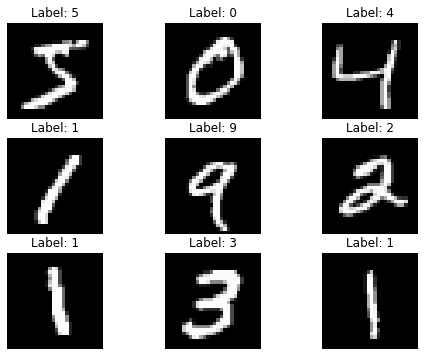

In [ ]:
num_imgs = 9
factor = np.int(np.sqrt(num_imgs))
fig, ax = plt.subplots(nrows=factor, ncols=factor,figsize=(8,6))
ind_offset = 0
for i in range(factor):
  index = ind_offset + i*(factor)
  for j in range(factor):
    ax[i,j].imshow(X[index+j].reshape(28,28),cmap='gray')
    ax[i,j].set_title(f"Label: {y[index+j]}")
    ax[i,j].set_axis_off();

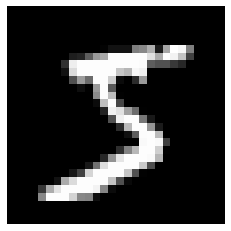

In [ ]:
plt.figure(figsize=(4,4))
plt.imshow(X[0].reshape(28,28),cmap='gray')
plt.axis(False)
plt.show()

##Data Splitting

In [ ]:
x_train,x_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

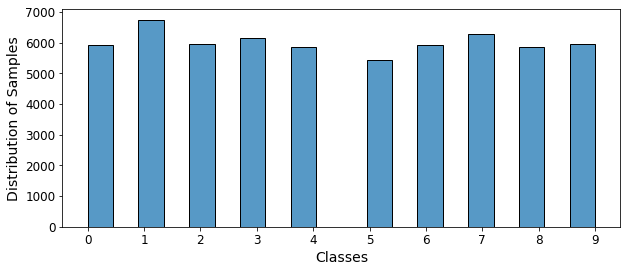

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(np.int8(y_train),binwidth=0.45,bins=11)
plt.xlabel("Classes")
plt.ylabel("Distribution of Samples")
plt.xticks(labels=[0,1,2,3,4,5,6,7,8,9],ticks=[0,1,2,3,4,5,6,7,8,9])
plt.show();

##Binary Classification: 0-Detector

In [ ]:
# New variables to declare the other digits from 1-9 as -1
y_train_0 = -1*(np.ones(np.size(y_train)))
y_test_0 = -1*(np.ones(np.size(y_test)))
# converting 0 to label as 1
index_0 = np.where(y_train=='0')
y_train_0[index_0] = 1
index_0 = np.where(y_test=='0')
y_test_0[index_0] = 1

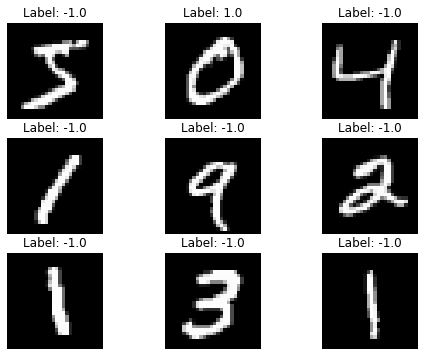

In [ ]:
num_imgs = 9
factor = np.int(np.sqrt(num_imgs))
fig, ax = plt.subplots(nrows=factor,ncols=factor,figsize=(8,6))
ind_offset = 0
for i in range(factor):
  index = ind_offset + i*(factor)
  for j in range(factor):
    ax[i,j].imshow(x_train[index+j].reshape(28,28),cmap='gray')
    ax[i,j].set_title(f"Label: {y_train_0[index+j]}")
    ax[i,j].set_axis_off()

Visualizing the data whose `0` label has been changes to `1` and other labels `[1,9]` has been changed to `-1`.

In [ ]:
num_label_0= np.size(np.where(y_train_0==1))
num_label_1_9 = np.size(np.where(y_train_0==-1))
print(f"#label 1: {num_label_0}")
print(f"#label(1 to 9): {num_label_1_9}")

#label 1: 5923
#label(1 to 9): 54077


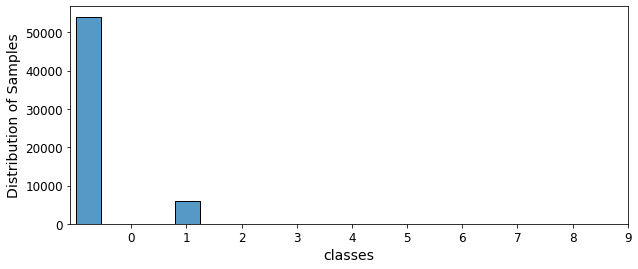

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(data=np.int8(y_train_0), binwidth=0.45, bins=11)
plt.xlabel("classes")
plt.ylabel("Distribution of Samples")
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9],rotation=0,labels=[0,1,2,3,4,5,6,7,8,9])
plt.show();

###Dummy Classifier--Base Model

In [ ]:
dum_clf = DummyClassifier(strategy='most_frequent')
dum_clf.fit(x_train,y_train_0)
dum_clf.score(x_train,y_train_0)

0.9012833333333333

###Logistic Regression Classification

####SGDClasiification without Regularization

In [ ]:
sgd_clf = SGDClassifier(loss='log',
                        learning_rate='constant',
                        eta0=0.01,
                        alpha=0,
                        penalty='l2',
                        max_iter=1,
                        warm_start=True,
                        random_state=42)

In [ ]:
loss=[]
iter=100
for epoch in range(iter):
  sgd_clf.fit(x_train,y_train_0)
  y_pred = sgd_clf.predict_proba(x_train)
  loss.append(log_loss(y_train_0,y_pred))

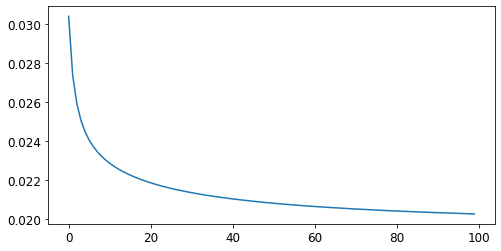

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(iter),loss)
plt.show();

In [ ]:
print(f"Training accuracy: {sgd_clf.score(x_train,y_train_0):.2f}")
print(f"Test accuracy: {sgd_clf.score(x_test,y_test_0):.2f}")
print('-'*60)
y_train_hat = sgd_clf.predict(x_train)
print(classification_report(y_train_0,y_train_hat,labels=[1,-1]))

Training accuracy: 0.99
Test accuracy: 0.99
------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.97      0.97      0.97      5923
          -1       1.00      1.00      1.00     54077

    accuracy                           0.99     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.99      0.99      0.99     60000



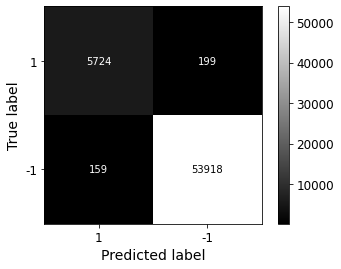

In [ ]:
con_display = ConfusionMatrixDisplay.from_predictions(y_train_0,
                                                      y_train_hat,
                                                      labels=[1,-1],
                                                      cmap='gray',
                                                      values_format='0.5g')

###Cross Validation

In [ ]:
estimator = SGDClassifier(loss='log',
                          penalty='l2',
                          eta0=0.01,
                          max_iter=100,
                          tol=0.001,
                          shuffle=True,
                          learning_rate='constant',
                          warm_start=False,
                          alpha=0,
                          random_state=42)
sgd_cross_val = cross_validate(estimator,
                               x_train,
                               y_train_0,
                               scoring=['precision','recall','f1'],
                               cv=5,
                               return_train_score=True,
                               return_estimator=True)


In [ ]:
pprint(sgd_cross_val)

{'estimator': [SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=100, random_state=42),
               SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=100, random_state=42),
               SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=100, random_state=42),
               SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=100, random_state=42),
               SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=100, random_state=42)],
 'fit_time': array([1.32121181, 1.31453896, 1.31163883, 1.30739784, 1.31197119]),
 'score_time': array([0.04895449, 0.04387689, 0.04313517, 0.04473853, 0.04434824]),
 'test_f1': array([0.95784148, 0.95703956, 0.95930736, 0.9543497 , 0.96321642]),
 'test_precision': array([0.95622896, 0.96401028, 0.98488889, 0.97449428, 0.97658283]),

In [ ]:
weights = sgd_clf.coef_
bias = sgd_clf.intercept_
print(f"Shape of Weights: {weights.shape}")
print(f"bias in the model: {bias}")

Shape of Weights: (1, 784)
bias in the model: [-4.79275605]


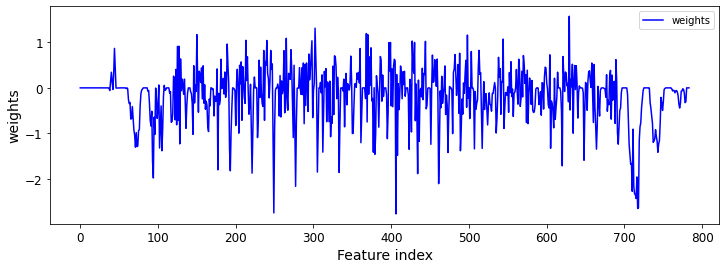

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(np.arange(0,784),weights[0],'b',label='weights')
plt.legend(loc='best')
plt.xlabel("Feature index")
plt.ylabel("weights")
plt.show();

In [ ]:
num_zero_w = np.size(np.where(weights[0]==0))
print(f"Number of Features having weight as zero: {num_zero_w}")

Number of Features having weight as zero: 67


#### Training with Regularization

In [ ]:
sgd_clf_l2 = SGDClassifier(loss='log',
                        learning_rate='constant',
                        eta0=0.01,
                        alpha=0.001,
                        penalty='l2',
                        max_iter=1,
                        warm_start=True,
                        random_state=42)

In [ ]:
loss=[]
iter=100
for epoch in range(iter):
  sgd_clf_l2.fit(x_train,y_train_0)
  y_pred = sgd_clf_l2.predict_proba(x_train)
  loss.append(log_loss(y_train_0,y_pred,))

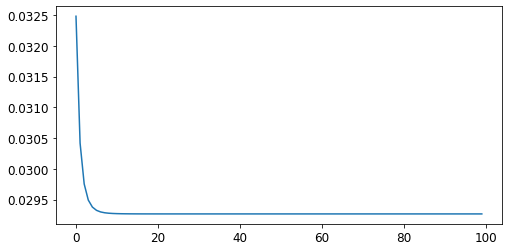

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(iter),loss)
plt.show();

In [ ]:
print(f"Training accuracy: {sgd_clf_l2.score(x_train,y_train_0):.2f}")
print(f"Test accuracy: {sgd_clf_l2.score(x_test,y_test_0):.2f}")
print('-'*60)
y_train_hat = sgd_clf_l2.predict(x_train)
print(classification_report(y_train_0,y_train_hat,labels=[1,-1]))

Training accuracy: 0.99
Test accuracy: 0.99
------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.97      0.93      0.95      5923
          -1       0.99      1.00      1.00     54077

    accuracy                           0.99     60000
   macro avg       0.98      0.97      0.97     60000
weighted avg       0.99      0.99      0.99     60000



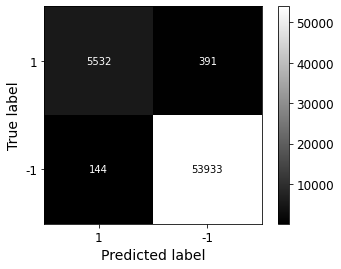

In [ ]:
con_display = ConfusionMatrixDisplay.from_predictions(y_train_0,
                                                      y_train_hat,
                                                      labels=[1,-1],
                                                      cmap='gray',
                                                      values_format='0.5g')

In [ ]:
weights = sgd_clf_l2.coef_
print(f"weights shape: {(sgd_clf_l2.coef_).shape}")
print(f"Bias: {sgd_clf_l2.intercept_}")

weights shape: (1, 784)
Bias: [-4.40387482]


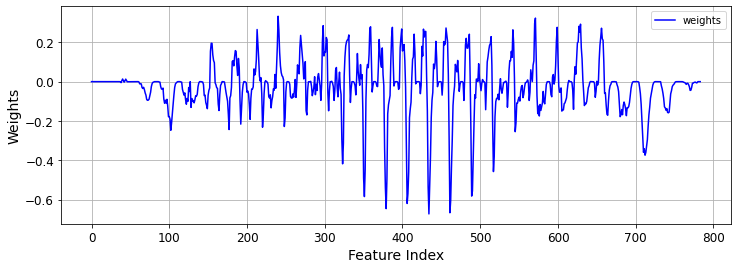

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(np.arange(0,784),weights[0], 'b', label='weights')
plt.xlabel("Feature Index")
plt.ylabel("Weights")
plt.legend(loc='best')
plt.grid(True)
plt.show();

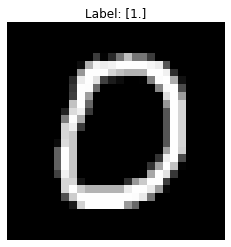

In [ ]:
# Displaying Images with SGDClassifier without regualrization
sgd_clf.fit(x_train,y_train_0)
y_pred_sgd_clf = sgd_clf.predict(x_test[10].reshape(1,-1))
plt.figure(figsize=(4,4))
plt.imshow(x_test[10,:].reshape(28,28),cmap='gray',)
plt.title(f"Label: {y_pred_sgd_clf}")
plt.axis(False)
plt.show();

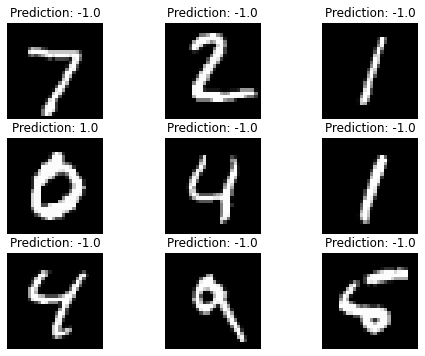

In [ ]:
y_pred_ = sgd_clf.predict(x_test)
num_img = 9
factor = np.int(np.sqrt(num_img))
fig, ax = plt.subplots(nrows=factor,ncols=factor,figsize=(8,6))
ind_offset = 0
for i in range(factor):
  index = ind_offset + i*(factor)
  for j in range(factor):
    ax[i,j].imshow(x_test[index+j].reshape(28,28),cmap='gray',)
    ax[i,j].set_title(f"Prediction: {y_pred_[index+j]}")
    ax[i,j].set_axis_off();

##HyperParameter Tuning

In [ ]:
lr_grid = loguniform(1e-2,1e-1)

In [ ]:
print(lr_grid.rvs(3,random_state=42))

[0.02368864 0.0892718  0.05395031]


In [ ]:
estimator = SGDClassifier(loss='log',
                        learning_rate='constant',
                        eta0=0.01,
                        alpha=0,
                        penalty='l2',
                        max_iter=1,
                        warm_start=True,
                        random_state=42)

In [ ]:
rand_cv = RandomizedSearchCV(estimator,
                             param_distributions={'eta0':lr_grid},
                             cv=5,
                             scoring=['precision','recall','f1'],
                             n_iter=5,
                             refit='f1')

In [ ]:
rand_cv.fit(x_train,y_train_0)

RandomizedSearchCV(cv=5,
                   estimator=SGDClassifier(alpha=0, eta0=0.01,
                                           learning_rate='constant', loss='log',
                                           max_iter=1, random_state=42,
                                           warm_start=True),
                   n_iter=5,
                   param_distributions={'eta0': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff71b8ab250>},
                   refit='f1', scoring=['precision', 'recall', 'f1'])

In [ ]:
pprint(rand_cv.cv_results_)

{'mean_fit_time': array([0.42894573, 0.42561183, 0.45928435, 0.35363951, 0.32502785]),
 'mean_score_time': array([0.05778351, 0.06025958, 0.06308684, 0.04604511, 0.04591751]),
 'mean_test_f1': array([0.94566102, 0.93322302, 0.94218836, 0.94378922, 0.94900002]),
 'mean_test_precision': array([0.9802894 , 0.97489747, 0.97703093, 0.97908294, 0.98022693]),
 'mean_test_recall': array([0.91355371, 0.89616461, 0.91017747, 0.91119099, 0.91980086]),
 'param_eta0': masked_array(data=[0.02368863950364078, 0.08927180304353625,
                   0.05395030966670228, 0.039687933304443715,
                   0.01432249371823025],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'eta0': 0.02368863950364078},
            {'eta0': 0.08927180304353625},
            {'eta0': 0.05395030966670228},
            {'eta0': 0.039687933304443715},
            {'eta0': 0.01432249371823025}],
 'rank_test_f1': array([2, 5, 4, 3, 1], dtype=int32),


In [ ]:
best_est = rand_cv.best_estimator_

In [ ]:
y_pred_rand_cv = rand_cv.predict(x_train)

In [ ]:
print(classification_report(y_train_0,y_pred_rand_cv,labels=[1,-1]))

              precision    recall  f1-score   support

           1       0.97      0.94      0.95      5923
          -1       0.99      1.00      1.00     54077

    accuracy                           0.99     60000
   macro avg       0.98      0.97      0.98     60000
weighted avg       0.99      0.99      0.99     60000



###Precision-recall tradeoff

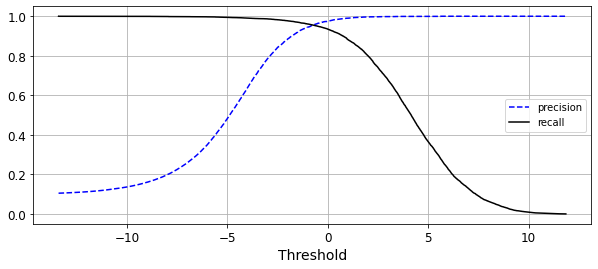

In [ ]:
y_scores_ = sgd_clf.decision_function(x_train)
precision, recall, threshold = precision_recall_curve(y_train_0,y_scores_)
plt.figure(figsize=(10,4))
plt.plot(threshold, precision[:-1],"b--",label='precision')
plt.plot(threshold, recall[:-1], "k-", label='recall')
plt.legend(loc='best')
plt.xlabel("Threshold")
plt.grid(True)
plt.show();

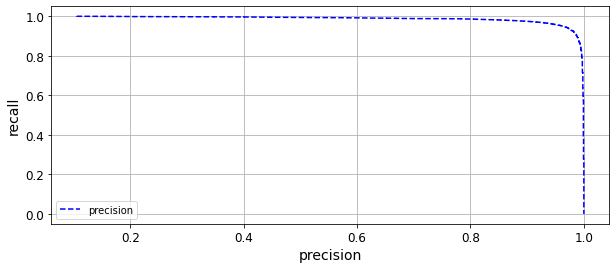

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(precision[:-1],recall[:-1],"b--",label='precision')
plt.xlabel("precision")
plt.ylabel("recall")
plt.grid(True)
plt.legend(loc='best')
plt.show();

###ROC curve

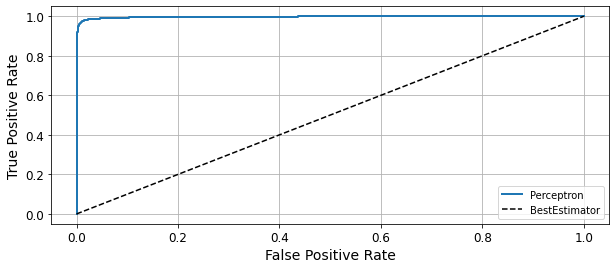

In [ ]:
fpr,tpr,threshold = roc_curve(y_train_0,y_scores_)
plt.figure(figsize=(10,4))
plt.plot(fpr,tpr,linewidth=2,label='Perceptron')
plt.plot([0,1],[0,1],'k--',label='BestEstimator')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid(True)
plt.show();

In [ ]:
roc_auc_score(y_train_0,y_scores_)

0.9970923209212833